<a href="https://colab.research.google.com/github/euneun316/Kaggle/blob/main/Titanic-Machine_Learning_from_Disaster/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

## Kaggle Titanic Data Import

In [ ]:
!pip install kaggle

In [ ]:
# Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=1ea12a673b3ffcdfdc491a9a729a99fca4514e6ae8e67c05bd5841f401520b0d
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# Create New API Token
# kaggle.json 업로드
from google.colab import files
files.upload()

In [ ]:
!ls -al

total 24
drwxr-xr-x 1 root root 4096 Jan 18 15:34 .
drwxr-xr-x 1 root root 4096 Jan 18 15:13 ..
drwxr-xr-x 4 root root 4096 Jan  7 14:33 .config
drwx------ 5 root root 4096 Jan 18 15:18 drive
-rw-r--r-- 1 root root   63 Jan 18 15:29 kaggle.json
drwxr-xr-x 1 root root 4096 Jan  7 14:33 sample_data


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!!ls -al ~/

['total 68',
 'drwx------ 1 root root 4096 Jan 18 15:16 .',
 'drwxr-xr-x 1 root root 4096 Jan 18 15:13 ..',
 '-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc',
 'drwxr-xr-x 1 root root 4096 Jan 13 14:37 .cache',
 'drwxr-xr-x 1 root root 4096 Jan 18 15:18 .config',
 'drwxr-xr-x 3 root root 4096 Jan 13 14:11 .gsutil',
 'drwxr-xr-x 1 root root 4096 Jan 13 14:34 .ipython',
 'drwx------ 2 root root 4096 Jan 13 14:34 .jupyter',
 'drwxr-xr-x 2 root root 4096 Jan 18 15:23 .kaggle',
 'drwxr-xr-x 2 root root 4096 Jan 18 15:13 .keras',
 'drwx------ 1 root root 4096 Jan 13 14:34 .local',
 'drwxr-xr-x 4 root root 4096 Jan 13 14:35 .npm',
 '-rw-r--r-- 1 root root  148 Aug 17  2015 .profile',
 '-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf']

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -al ~/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Jan 18 15:23 .
drwx------ 1 root root 4096 Jan 18 15:16 ..
-rw------- 1 root root   63 Jan 18 15:34 kaggle.json


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         77           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        108           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        907           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        176           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1888           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13479           False  
house-pr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic-Machine_Learning_from_Disaster/Titanic_Data/

/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic-Machine_Learning_from_Disaster/Titanic_Data


In [ ]:
ls -al

total 92
-rw------- 1 root root  3258 Jan 19 04:46 gender_submission.csv
-rw------- 1 root root 28629 Jan 19 04:46 test.csv
-rw------- 1 root root 61194 Jan 19 04:46 train.csv


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 3.72MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 7.51MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 409kB/s]


## import  library

In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import random as rnd

In [ ]:
# 시각화
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프를 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 시각화 선명하게 설정
%config InlineBackend.figure_format = 'retina'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
# Rich output(도표와 같은 그림, 소리, 애니메이션 과 같은 결과물)
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 데이터프레임의 행과 열을 몇 개까지 출력해서 확인할 건지 설정
pd.options.display.max_rows = 30
pd.options.display.max_rows = 30

# Seaborn을 통한 설정
# 스타일, 폰트 설정
sns.set_theme(font ='NanumBarunGothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')

In [ ]:
# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# matplotlib
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())

버전:  3.2.2
설치 위치:  /usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정파일 위치:  /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
# 설정 되어있는 폰트 사이즈
print (plt.rcParams['font.size'] ) 
# 설정 되어있는 폰트 글꼴
print (plt.rcParams['font.family'] )

12.0
['NanumBarunGothic']


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

48


In [ ]:
# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [ ]:
fm._rebuild()

In [ ]:
#'Nanum'이 들어간 폰트만 가져오기
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

In [ ]:
# 버전차이로 인해 출력되는 에러 문구 무시
import warnings
warnings.filterwarnings(action='ignore')

## OverView

RMS 타이타닉(영어: RMS Titanic)은 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선이다. 

1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰하였다. 

타이타닉이 완전히 침몰한시간은 새벽 2시20분이다. 타이타닉의 침몰로 1,514명이 사망하였다.

RMS 타이타닉은 첫 항해 당시 세계에서 가장 큰 배 중 하나였다. 

화이트 스타 라인 사는 RMS 올림픽을 시작으로 세 척의 올림픽급 여객선을 운용하였는데, RMS 타이타닉이 그 중 하나였다. 

RMS 타이타닉은 벨파스트에 있는 해럴드 앤 울프 사가 1909년 건조를 시작하여 1911년 5월 31일 진수하였다.

승객 대다수는 영국과 스칸다나비아 반도 등에서 새로운 삶을 찾아 미국으로 가는 이민자들이었다. 출항 당시 승선 인원은 2,223명이었다.

타이타닉호는 선내에 체육관과 수영장, 그 외의 호화로운 시설을 갖추고 있었다. 

그러나 느슨한 규제로 구명정은 20척 밖에 없었다. 

구명정 20척의 최대 정원은 1,178명이었다. 1912년 4월 14일 오후 11시 40분(선내 시각, GMT -3) 빙산과 충돌하였고 이 때문에 주갑판이 함몰되고 우현에 구멍이 났다. 구멍으로 물이 들어오기 시작한 지 2시간 40분만에 완전히 침수되어 침몰하였다. 타이타닉호는 방수용 격벽이 설계되어 있었고 문들도 물을 차단할 수 있도록 설계되었으나 실제 사고에선 역부족이었다. 

구명정에 타지 못한 채 바다로 뛰어든 수많은 사람들은 수 분 내에 저체온증으로 사망하였다. 침몰 당시에도 배에 1,000여명의 사람들이 남아 있었다. 

구명정을 타고 있다가 몇 시간 뒤 RMS 카르파티아(RMS Carpathia)로 구조된 사람은 706명에 불과하였다.

=> 다시 한번 세세한 배경을 읽어볼 예정!
https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89

## 데이터 셋 불러오기

- train.csv : 모델 학습에 사용되는 데이터
- test.csv : 모델 적용 대상이 되는 데이터

In [ ]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")
# 모델 적용의 일관성을 위해,
# train과 test를 합한 combine 데이터 셋도 지정
combine=[train_df,test_df]

In [ ]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### 변수설명
PassengerId : 각 승객의 고유 번호

Survived : 생존 여부(종속 변수)
+ 0 = 사망
+ 1 = 생존

Pclass : 객실 등급 - 승객의 사회적, 경제적 지위
+ 1st = Upper
+ 2nd = Middle
+ 3rd = Lower

Name : 이름

Sex : 성별

Age : 나이

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

Parch : 동반한 Parent(부모) Child(자식)의 수

Ticket : 티켓의 고유넘버

Fare : 티켓의 요금

Cabin : 객실 번호

Embarked : 승선한 항
+ C = Cherbourg
+ Q = Queenstown
+ S = Southampton

| **Variable** | **Definition**                             | **Key**                                        |
| :----------- | :-------------------------------- | :---------------------- |
| survival     | Survival                                   | 0 = No, 1 = Yes                                |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex          | Sex                                        |                                                |
| Age          | Age in years                               |                                                |
| sibsp        | # of siblings / spouses aboard the Titanic |                                                |
| parch        | # of parents / children aboard the Titanic |                                                |
| ticket       | Ticket number                              |                                                |
| fare         | Passenger fare                             |                                                |
| cabin        | Cabin number                               |                                                |
| embarked     | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [ ]:
# 데이터 미리 보기
train_df.head()

# 두 변수의 관계에서 설명을 하는 변수 : 설명변수(explanatory variable)
# 이에 반응하는 변수를 : 반응변수(response variable)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# 훈련 자료 정보
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 테스트 자료 정보
# Survived - 생존 여부
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 데이터 분석

In [ ]:
# 훈련 자료 int, float 변수 통계치
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


+ 훈련 자료 샘플 수 : 891 (count=891)
+ 훈련 자료 샘플 내 생존율 : 38.4% (mean의 Survived=0.383838)

In [ ]:
# 훈련 자료 object 변수 통계치
# train_df.describe(include=['O']) -> 범주형 데이터 특징 살펴보기
train_df.describe(include="all") #->데이터 정보 얻기 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Silverthorne, Mr. Spencer Victor",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### training data set에서 객실 등급(Pclass)에 따른 생존율 비교

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#groupby에 as_index를 False로 하면 Pclass를 index로 사용하지 않음
# ascending : 오름차순
# as_index를 True로 하면 Pclass를 index로 사용

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- 객실 등급이 좋을 수록 생존율이 높음

### training data set에서 성별(Sex)에 따른 생존율 비교

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- 여성의 생존율이 남성보다 높음

### training data set에서 함께 승선한 형제자매와 배우자 수(SibSp)에 따른 생존율 비교

In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


- 형제자매와 배우자 수(SibSp)가 작을수록 생존확률이 높음

### training data set에서 함께 승선한 부모와 자식 수(Parch)에 따른 생존율 비교

In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- 식솔들 1,2,3명일 경우 생존률이 높다 
- 4,5,6명일 경우 생존률이 낮다
- 0명인 경우는 왜 생존률이 낮을까? -> 혼자라서 그냥 삶을 포기한건가..?

### training data set에서 생존 여부(Survived)에 따른 연령(Age) 분포

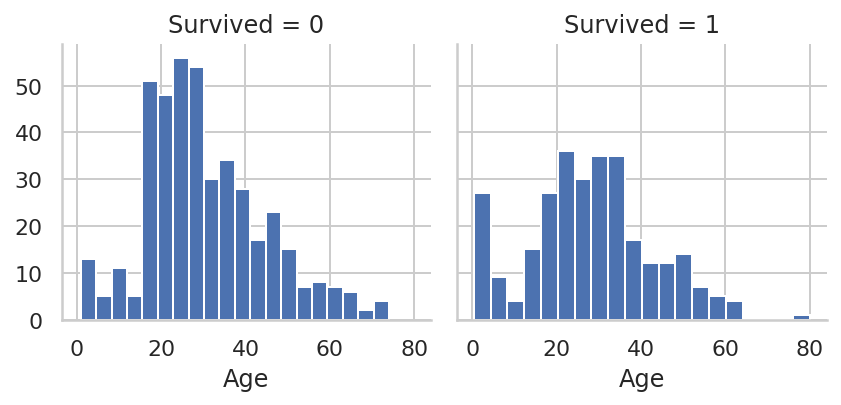

In [ ]:
# 열(col)을 생존 여부로 나눔
# FacetGrid(data, row, col, hue) : 다중 플롯 그리드를 만들어서 여러가지 쌍 관계를 표현하기 위한 그리드 Class이다. 도화지에 축을 나누는 것과 같다. 
g = sns.FacetGrid(train_df, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
# bins 파라미터는 히스토그램의 가로축 구간의 개수를 지정합니다.
g.map(plt.hist, 'Age', bins=20)
# 1이 생존

- 4세 이하의 유아의 생존율이 높음
- 15 ~ 25세 승객들의 생존율이 높음

### training data set에서 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포

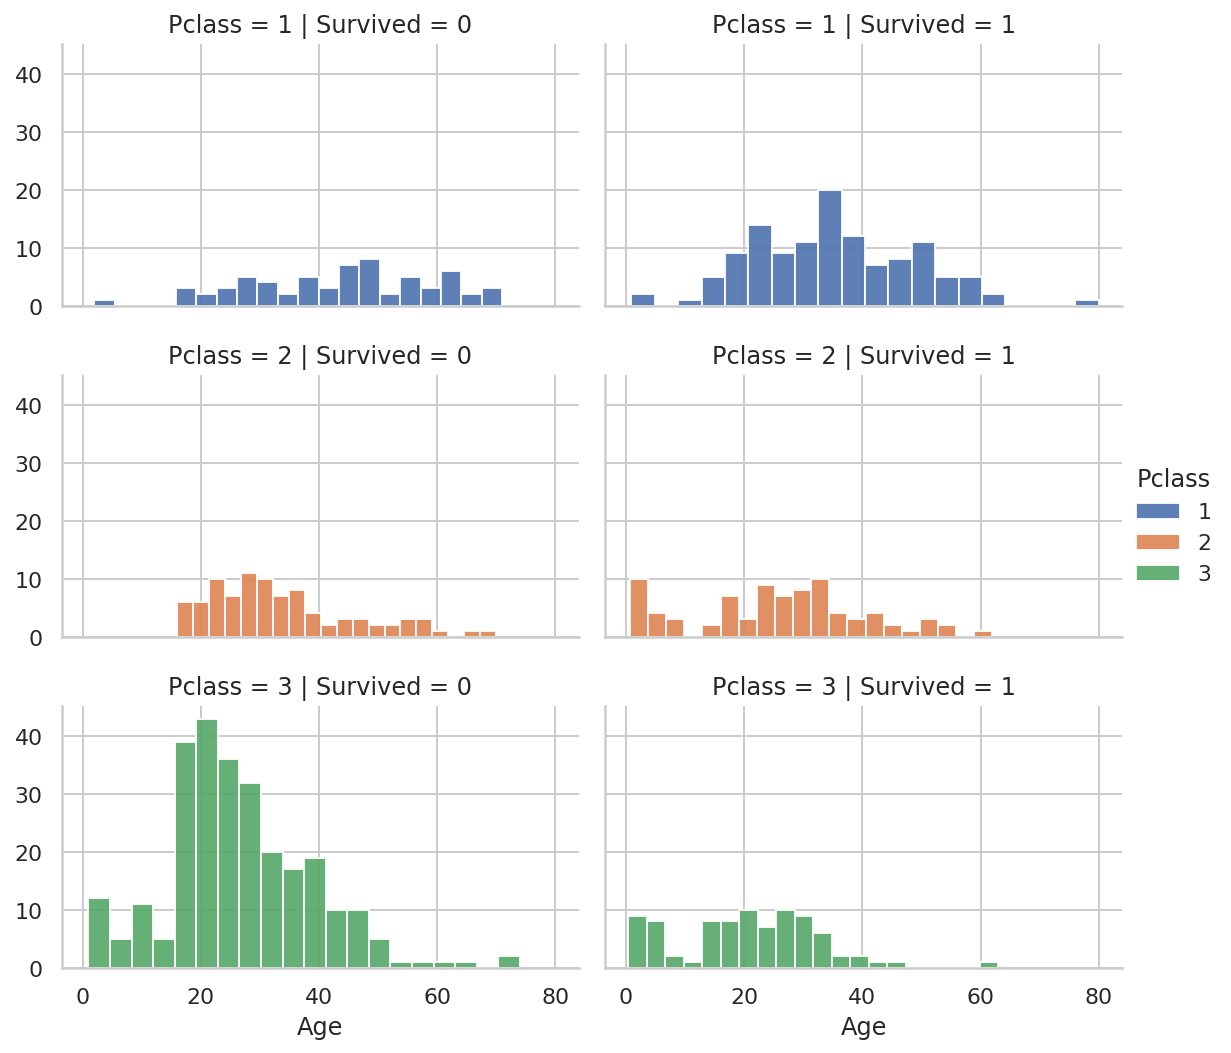

In [ ]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue="Pclass", height=2.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.9, bins=20) # 투명도(alpha): 0.5

# 범례 추가
grid.add_legend();

+ 객실 등급이 3등급인 경우, 승객 수는 가장 많고, 생존율도 가장 낮음
+ 객실 등급이 2등급인 유아는 대부분 생존함
+ 객실 등급이 1등급인 경우 생존율이 비교적 높음
  - 1등급은 왜?

### training data set에서 승선지(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived)

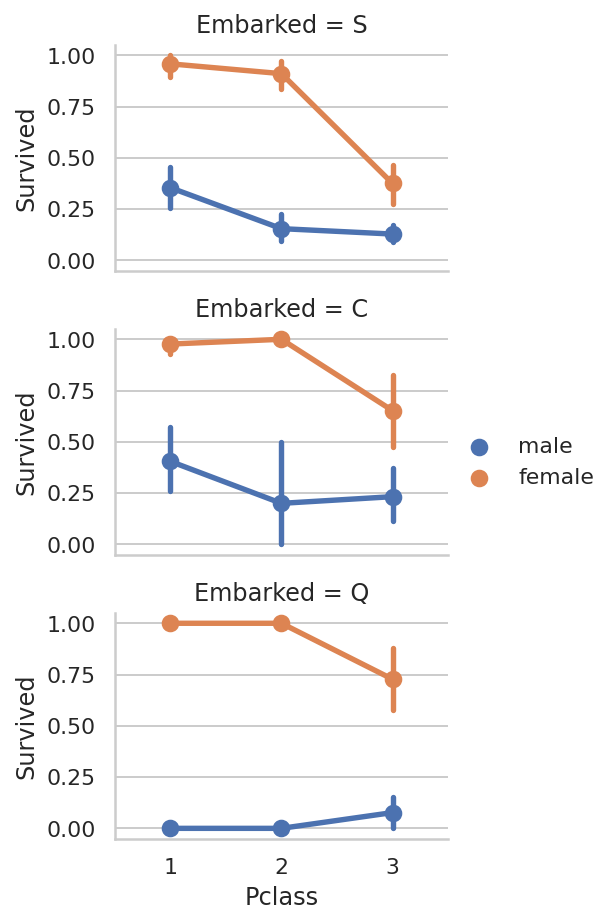

In [30]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

- 세 승선지 모두 3등급의 여성 승객 생존율이 1,2 등급에 비해 떨어진다.